# Kmeans + Hierarchical Clustering

In [19]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

### Loading in data

In [4]:
# loading in data
file_path = os.path.join("data", "movement_libras.csv")
data_df = pd.read_csv(file_path)

data_df.head()

,1st_coordinate_abcissa,1st_coordinate_ordinate,2st_coordinate_abcissa,2st_coordinate_ordinate,3st_coordinate_abcissa,3st_coordinate_ordinate,4st_coordinate_abcissa,4st_coordinate_ordinate,5st_coordinate_abcissa,5st_coordinate_ordinate,...,41st_coordinate_ordinate,42st_coordinate_abcissa,42st_coordinate_ordinate,43st_coordinate_abcissa,43st_coordinate_ordinate,44st_coordinate_abcissa,44st_coordinate_ordinate,45st_coordinate_abcissa,45st_coordinate_ordinate,Class
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398,1
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213,1
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778,1
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306,1
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259,1


### Preprocessing

In [5]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# extract labels and predictors
labels = data_df['Class']
predictors = data_df.drop('Class', axis = 1)

# Fit the scaler to the data and transform the data
scaled_preds = scaler.fit_transform(predictors)

# turning scaled_data into dataframe
scaled_data = pd.DataFrame(scaled_preds, columns=predictors.columns)

# concat scaled data and labels
scaled_df = pd.concat([scaled_data, labels], axis = 1)


### Kmeans

In [6]:
ari = np.zeros(1000)
nmi = np.zeros(1000)

In [7]:
import warnings

# Filter FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# for loop from 1 to 1000
for i in range(0, 1000):

    # Initializing KMeans object
    kmeans = KMeans(n_clusters = 15)

    # Fit the KMeans model to the data
    kmeans.fit(scaled_df.drop('Class', axis=1))

    # Get the cluster labels for each data point
    pred_labels = kmeans.labels_

    # get the scores
    ari[i] = adjusted_rand_score(labels, pred_labels)
    nmi[i] = normalized_mutual_info_score(labels, pred_labels)

In [8]:
# getting summary statistics for ari
print(np.mean(ari))
print(np.std(ari))

# getting summary statistics for ari
print(np.mean(nmi))
print(np.std(nmi))

0.31092449433438357
0.012723902947174485
0.5939235774013512
0.011024192281455576


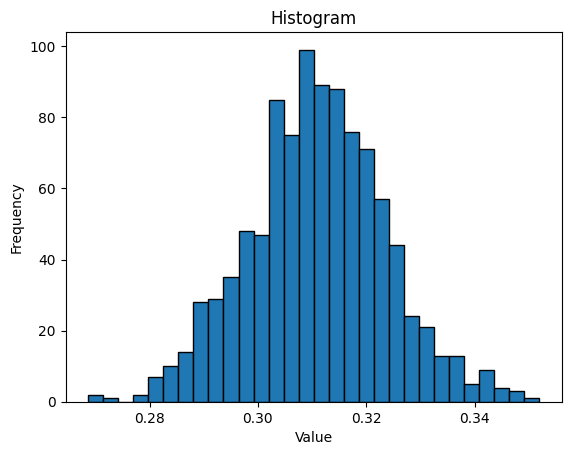

In [9]:
# ari histogram
plt.hist(ari, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()


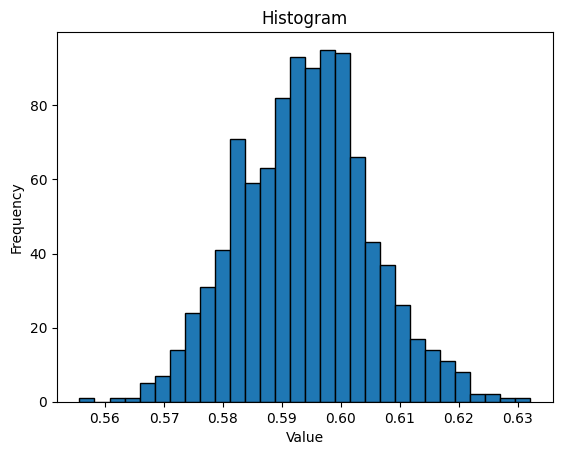

In [10]:
# nmi histogram
plt.hist(nmi, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()


### Elbow plot of Kmeans

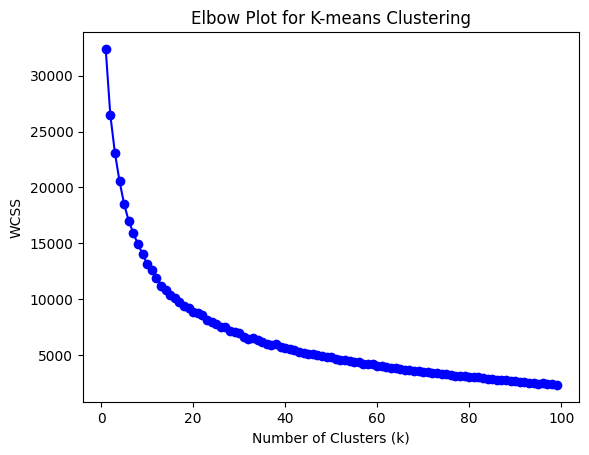

In [11]:
# making an elbow plot
k_values = range(1,100)

wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df.drop('Class', axis=1))
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot for K-means Clustering')
plt.show()

### Hierarchical clustering
Comparing single and complete linkages

In [12]:
# creating distance matrix
distance_matrix = pdist(scaled_df.drop('Class', axis=1), metric='euclidean')

# single linkage
single_linkage = sch.linkage(distance_matrix, method='single')

# complete linkage
complete_linkage = sch.linkage(distance_matrix, method='complete')

#### Plotting the dendograms

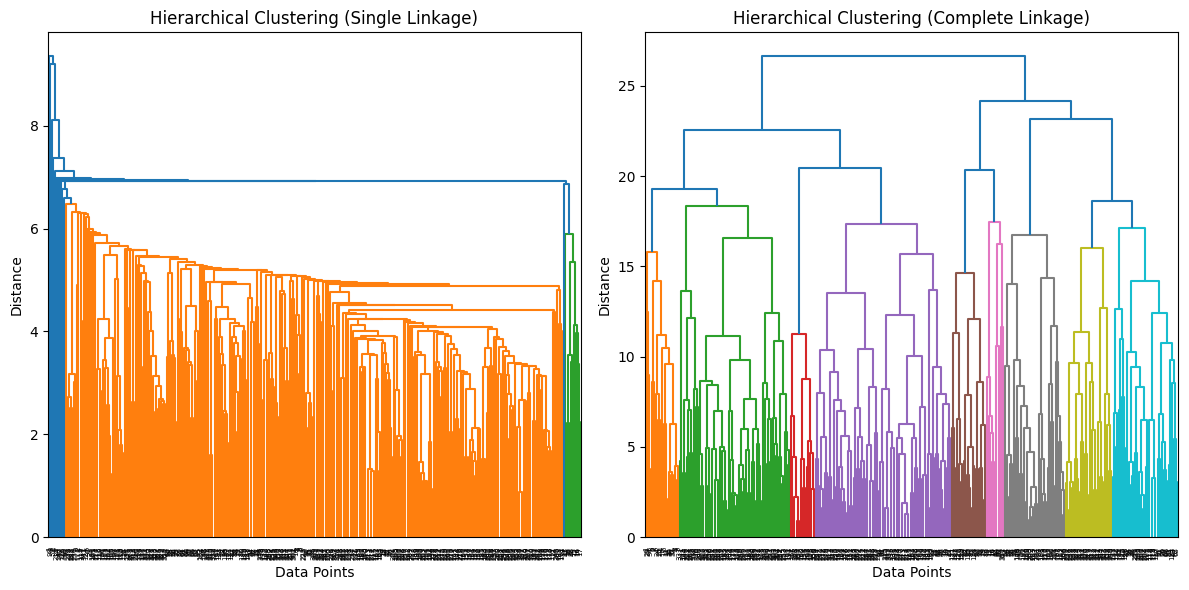

In [13]:
# plotting the dendograms
plt.figure(figsize=(12, 6))

# Plot the dendrogram for single linkage
plt.subplot(1, 2, 1)
sch.dendrogram(single_linkage)
plt.title('Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Plot the dendrogram for complete linkage
plt.subplot(1, 2, 2)
sch.dendrogram(complete_linkage)
plt.title('Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

### KMeans with PCA

In [15]:
# Define the variables
X = scaled_data
y = labels

In [20]:
# fitting the PCA
pca = PCA()
pca.fit(X)

PCA()

In [22]:
# getting total number of principal components
num_pcs = X.shape[1]

# pca.transform returns a numpy array
pca_train = pca.transform(X)[:, :num_pcs]

# we turn the numpy array into a pandas dataframe
pca_train_df = pd.DataFrame(pca_train, columns=[f"PC{i+1}" for i in range(num_pcs)])

pca_train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
0,1.432937,-0.306801,-1.525533,1.348544,-1.758649,-7.326680,3.520457,4.550448,-1.288591,-0.289943,...,-0.003889,-0.000232,0.012096,-0.000703,-0.009371,-0.003609,-0.002272,-0.009365,-0.003463,0.001812
1,3.357000,-0.385826,0.963611,3.350085,-4.415802,-1.882927,5.287033,0.660201,7.479825,1.409505,...,0.003024,-0.013299,0.001596,-0.007841,0.007676,-0.006257,-0.000693,-0.000406,0.002128,0.003863
2,2.788135,1.444009,-0.411853,1.990324,-2.563313,-5.946455,4.236742,5.267944,-2.703482,-1.818713,...,-0.004670,0.000666,0.007568,-0.003073,0.008452,-0.016964,0.010455,0.002463,0.008204,0.003636
3,4.031966,-2.921842,2.047248,4.821118,-4.145654,-5.588366,4.627286,3.287820,1.363997,0.800891,...,0.010208,0.001740,0.004393,0.014736,-0.011668,0.003859,-0.006896,0.009983,-0.003897,-0.004439
4,0.694755,2.519313,-2.134674,0.126994,0.979086,-8.365533,2.354174,0.722235,-1.047500,-0.048135,...,0.010092,-0.003389,0.001480,0.002995,0.003692,0.002949,0.001080,-0.003150,-0.000034,0.003104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-7.157904,-0.220915,0.259743,-6.859557,2.791980,-0.039055,-0.041785,-0.340202,0.700304,-0.543117,...,-0.008616,-0.013770,0.006502,0.010517,-0.000939,-0.002707,-0.005517,-0.007343,-0.006464,-0.004930
356,-5.497275,0.864771,0.487217,-4.556896,2.148665,-0.289199,0.201974,-0.362639,0.627463,-0.285794,...,-0.003727,0.004378,0.005686,-0.004093,-0.001757,0.007960,-0.010793,-0.002770,0.005008,0.001939
357,-6.216679,-1.383721,0.350621,-5.703880,2.134564,-0.067392,0.295952,-0.587950,0.481623,0.014243,...,-0.000974,0.004066,0.000979,-0.006000,-0.000375,-0.000984,-0.008155,0.008190,0.002471,-0.008335
358,-7.157904,-0.220915,0.259743,-6.859557,2.791980,-0.039055,-0.041785,-0.340202,0.700304,-0.543117,...,-0.008616,-0.013770,0.006502,0.010517,-0.000939,-0.002707,-0.005517,-0.007343,-0.006464,-0.004930


In [34]:
# keeping 80% of the variace
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

def explain_perc_var(perc_explain):
    num_pcs = np.argmax(cumulative_variance_ratio >= perc_explain) + 1
    perc_explain = float(perc_explain) * 100
    print(num_pcs,'pcs to explain', perc_explain, '% of variance')
    return(num_pcs)

num_pcs = explain_perc_var(0.8)

# getting the first 5 principal components
pca_train_df_80 = pca_train_df.iloc[:,0:num_pcs]

5 pcs to explain 80.0 % of variance


In [35]:
ari_pca = np.zeros(1000)
nmi_pca = np.zeros(1000)

In [39]:
# Filter FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# for loop from 1 to 1000
for i in range(0, 1000):

    # Initializing KMeans object
    kmeans = KMeans(n_clusters = 15)

    # Fit the KMeans model to the data
    kmeans.fit(pca_train_df_80)

    # Get the cluster labels for each data point
    pred_labels = kmeans.labels_

    # get the scores
    ari_pca[i] = adjusted_rand_score(labels, pred_labels)
    nmi_pca[i] = normalized_mutual_info_score(labels, pred_labels)

In [40]:
# getting summary statistics for ari
print(np.mean(ari_pca))
print(np.std(ari_pca))

# getting summary statistics for ari
print(np.mean(nmi_pca))
print(np.std(nmi_pca))

0.2599476298852866
0.011343196746258348
0.5471812173867311
0.00924714152614309
